# Assignment 5
### Do all four questions.

## **1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [92]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [93]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

print(A @ e_1, A @ e_2, A @ e_3)

[1 4 7] [2 5 8] [3 6 9]


In linear algebra, multiplying a matrix by a vector forms a linear combination of the matrix’s columns, weighted by the elements of the vector. Each entry in the result is the sum of products between a row of the matrix and the vector’s components. When you multiply by a standard basis vector—like e₁ = [1,0,0]—only one element of the vector is nonzero, so the result takes just that corresponding column of the matrix. This is why A @ e₁ gives the first column of A, A @ e₂ gives the second, and A @ e₃ gives the third.

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [94]:
u = np.ones(3)

print(A @ u)

[ 6. 15. 24.]


When you multiply the matrix A by the vector u = (1,1,1), each entry of the result is the sum of the elements in a row of A, because every component of u contributes equally with a weight of 1. In terms of linear algebra, this means you’re taking a linear combination of all three columns of A—specifically, the first column plus the second plus the third. So the result represents the sum of A’s columns, or equivalently, the row sums of A.

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [95]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])

print(A @ x)

[-2  4 11]


When you multiply a matrix $A$ by the vector $x$, each entry of the result is the dot product of a row of $A$ with $x$, combining the elements of $x$ according to the weights in that row. However, when $A$ is the identity matrix, the only nonzero elements are the 1’s on the diagonal. This means that when you take each row’s dot product with $x$, only one term of $x$ is multiplied by 1 (the matching position), and all others are multiplied by 0. As a result, the output vector is exactly the same as the input vector—so multiplying the identity matrix by any vector leaves that vector unchanged.

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [96]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])

print(A @ x)


[11 -2  4]


Even though each row and column sums to 1, the 1’s are not on the diagonal. Instead, each row of $A$ selects a different element of $x$ and places it in a new position. This makes $A$ a permutation matrix, which reorders the components of $x$ rather than leaving it unchanged like the identity matrix.

Here, $A$ cycles the entries of $x$:
* The first row takes $x_3$
* The second row takes $x_1$
* The third row takes $x_2$.

So multiplying by $A$ permutes $x$ into $(x_3, x_1, x_2)$, giving $[11, -2, 4]$.

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [97]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)
print(e_1 @ A, e_2 @ A, e_3 @ A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]
[0.50052958 0.24049286 0.18358131] [0.02574731 0.39251588 0.37907577] [0.47372311 0.36699127 0.43734292]


When you multiply the Markov transition matrix $A$ by each standard basis vector $e_1$, $e_2$, and $e_3$, the result is each corresponding column of $A$. This happens because multiplying by $e_j$ isolates the $j$-th column, representing what happens if all observations start in state $j$. Each column of $A$ contains the probabilities of transitioning from state $j$ to every other state in one step, and since the columns of a Markov matrix sum to $1$, each column vector $A e_j$ describes a valid probability distribution of the next state given that starting state.

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [98]:
iters = 100
prods_e1 = []
prods_e1.append(e_1 @ A)
prods_e2 = []
prods_e2.append(e_2 @ A)
prods_e3 = []
prods_e3.append(e_3 @ A)

for i in range(iters):
    prods_e1.append(prods_e1[i] @ A)
    prods_e2.append(prods_e2[i] @ A)
    prods_e3.append(prods_e3[i] @ A)
    if i % 10 == 0:
        print(prods_e1[i], prods_e2[i], prods_e3[i])

[0.50052958 0.24049286 0.18358131] [0.02574731 0.39251588 0.37907577] [0.47372311 0.36699127 0.43734292]
[0.29206579 0.29206572 0.29206569] [0.2796389  0.27963903 0.27963908] [0.42829531 0.42829525 0.42829523]
[0.29206573 0.29206573 0.29206573] [0.27963902 0.27963902 0.27963902] [0.42829526 0.42829526 0.42829526]
[0.29206573 0.29206573 0.29206573] [0.27963902 0.27963902 0.27963902] [0.42829526 0.42829526 0.42829526]
[0.29206573 0.29206573 0.29206573] [0.27963902 0.27963902 0.27963902] [0.42829526 0.42829526 0.42829526]
[0.29206573 0.29206573 0.29206573] [0.27963902 0.27963902 0.27963902] [0.42829526 0.42829526 0.42829526]
[0.29206573 0.29206573 0.29206573] [0.27963902 0.27963902 0.27963902] [0.42829526 0.42829526 0.42829526]
[0.29206573 0.29206573 0.29206573] [0.27963902 0.27963902 0.27963902] [0.42829526 0.42829526 0.42829526]
[0.29206573 0.29206573 0.29206573] [0.27963902 0.27963902 0.27963902] [0.42829526 0.42829526 0.42829526]
[0.29206573 0.29206573 0.29206573] [0.27963902 0.279639

When you repeatedly multiply the Markov transition matrix $A$ by each standard basis vector $e_1$, $e_2$, and $e_3$, you are effectively simulating multiple steps of the Markov process starting entirely in one state. After each multiplication, the resulting vector gives the probability distribution across all states after that many transitions. As you continue multiplying (five times here), the entries of each resulting vector get closer together—each initial state’s distribution starts to look more and more alike. This shows the system is moving toward a steady-state distribution, where the probabilities no longer depend on the starting state. In other words, regardless of whether you start with $e_1$, $e_2$, or $e_3$, repeated multiplication by $A$ drives the state vector toward the same long-run equilibrium pattern.

## 2. Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


$[1 \ \ \ 0] \times \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right]=[0.25 \ \ \ 0.5]$

$[0 \ \ \ 1] \times \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right]=[0.75 \ \ \ 0.5]$

In [99]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

e1 = np.array([1, 0])
e2 = np.array([0, 1])

iters = 16
prods_e1 = []
prods_e1.append(e1 @ T)
prods_e2 = []
prods_e2.append(e2 @ T)

for i in range(iters):
    prods_e1.append(prods_e1[i] @ T)
    prods_e2.append(prods_e2[i] @ T)
    if i % 2 == 0:
        print(prods_e1[i], prods_e2[i])


[0.25 0.5 ] [0.75 0.5 ]
[0.390625 0.40625 ] [0.609375 0.59375 ]
[0.39941406 0.40039062] [0.60058594 0.59960938]
[0.39996338 0.40002441] [0.60003662 0.59997559]
[0.39999771 0.40000153] [0.60000229 0.59999847]
[0.39999986 0.4000001 ] [0.60000014 0.5999999 ]
[0.39999999 0.40000001] [0.60000001 0.59999999]
[0.4 0.4] [0.6 0.6]


Starting from $[1,0]$, the first multiplication $T[1,0]$ picks out the first column of $T$ and gives $[0.25,0.5]$, which is the one-step-ahead distribution (the proportions in states 1 and 2 in the next period if everyone is currently in state 1); multiplying by $T$ again produces $T^2[1,0]=[0.39, 0.41]$, which is not a column of $T$ but rather the two-step forecast (the distribution of states two periods from now obtained by applying the transition rule twice); continuing to apply $T$ repeatedly gives the sequence  printed above and it settles when further multiplications no longer change the vector because the stationary distribution $\pi$ has been reached, satisfying $T\pi=\pi$ (here $\pi=[0.4,0.4]$), and repeating the whole procedure from $[0,1]$ leads to the same limit, so in the long run the chain converges to the same steady-state proportions and sensitivity to the initial condition vanishes.

## 3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [100]:
import pandas as pd

weather = pd.read_csv("data/cville_weather.csv")

In [101]:
weather['rain'] = (weather['PRCP'] > 0).astype(int)

rain = np.array(weather['rain'])

# Count transitions
n00 = np.sum((rain[:-1] == 0) & (rain[1:] == 0))  # no rain → no rain
n01 = np.sum((rain[:-1] == 0) & (rain[1:] == 1))  # no rain → rain
n10 = np.sum((rain[:-1] == 1) & (rain[1:] == 0))  # rain → no rain
n11 = np.sum((rain[:-1] == 1) & (rain[1:] == 1))  # rain → rain

# Build the transition matrix
P = np.array([
    [n00 / (n00 + n01), n01 / (n00 + n01)],  # from state 0
    [n10 / (n10 + n11), n11 / (n10 + n11)]   # from state 1
])

print(P)


[[0.73160173 0.26839827]
 [0.35195531 0.64804469]]


Given the transition matrix above, if it was rainy yesterday, there is a 64.8% chance it will be raining again today. Additionally, if it was clear yestderday, then there is a 26.8% chance that it will be raining today.

In [102]:
iters = 24
e1 = np.array([1, 0])   # start from a clear day
e2 = np.array([0, 1])   # start from a rainy day

prods_e1 = [e1]
prods_e2 = [e2]

for i in range(iters):
    prods_e1.append(prods_e1[-1] @ P)
    prods_e2.append(prods_e2[-1] @ P)

    if i % 2 == 0:
        print(f"Iter {i}: Clear start → {prods_e1[-1]}, Rainy start → {prods_e2[-1]}")

Iter 0: Clear start → [0.73160173 0.26839827], Rainy start → [0.35195531 0.64804469]
Iter 2: Clear start → [0.59102067 0.40897933], Rainy start → [0.5363017 0.4636983]
Iter 4: Clear start → [0.57075852 0.42924148], Rainy start → [0.5628718 0.4371282]
Iter 6: Clear start → [0.56783811 0.43216189], Rainy start → [0.56670139 0.43329861]
Iter 8: Clear start → [0.56741719 0.43258281], Rainy start → [0.56725335 0.43274665]
Iter 10: Clear start → [0.56735652 0.43264348], Rainy start → [0.5673329 0.4326671]
Iter 12: Clear start → [0.56734777 0.43265223], Rainy start → [0.56734437 0.43265563]
Iter 14: Clear start → [0.56734651 0.43265349], Rainy start → [0.56734602 0.43265398]
Iter 16: Clear start → [0.56734633 0.43265367], Rainy start → [0.56734626 0.43265374]
Iter 18: Clear start → [0.56734631 0.43265369], Rainy start → [0.5673463 0.4326537]
Iter 20: Clear start → [0.5673463 0.4326537], Rainy start → [0.5673463 0.4326537]
Iter 22: Clear start → [0.5673463 0.4326537], Rainy start → [0.5673463 

In both coniditions (starting from a clear day and starting from a rainy day), it converges down to a fixed result in about 20 iterations.

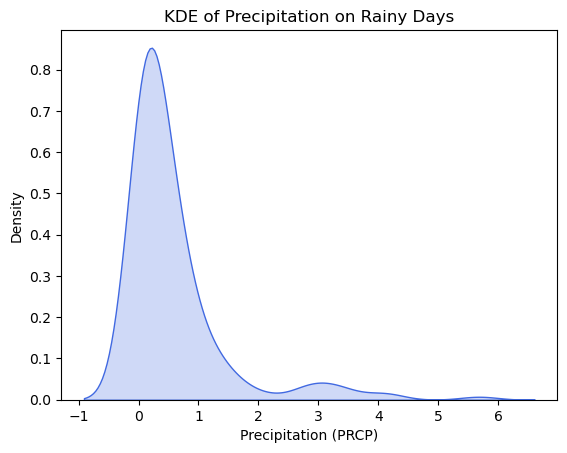

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only rainy days
rainy_days = weather[weather['rain'] == 1]

# Plot KDE for precipitation
sns.kdeplot(data=rainy_days, x='PRCP', fill=True, color='royalblue')

plt.title('KDE of Precipitation on Rainy Days')
plt.xlabel('Precipitation (PRCP)')
plt.ylabel('Density')
plt.show()


The KDE plot shows that most rainy days have light precipitation (close to zero), but there’s a long right tail from heavier rain events.

A simple two-state Markov chain (rain/no-rain) captures persistence of rain but ignores how much it rains when it does. So, one effective way to improve the model for forecasting and simulation would be to upgrade to a multi-component Markov weather model that includes both the occurrence and amount of precipitation.

## 4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

State space (37 states): ['Battery Park City', 'Central Park', 'Chelsea', 'Chinatown', 'Civic Center', 'East Harlem', 'East Village', 'Ellis Island', 'Financial District', 'Flatiron District', 'Governors Island', 'Gramercy', 'Greenwich Village', 'Harlem', "Hell's Kitchen", 'Inwood', 'Kips Bay', 'Liberty Island', 'Little Italy', 'Lower East Side', 'Marble Hill', 'Midtown', 'Morningside Heights', 'Murray Hill', 'NoHo', 'Nolita', "Randall's Island", 'Roosevelt Island', 'SoHo', 'Stuyvesant Town', 'Theater District', 'Tribeca', 'Two Bridges', 'Upper East Side', 'Upper West Side', 'Washington Heights', 'West Village']


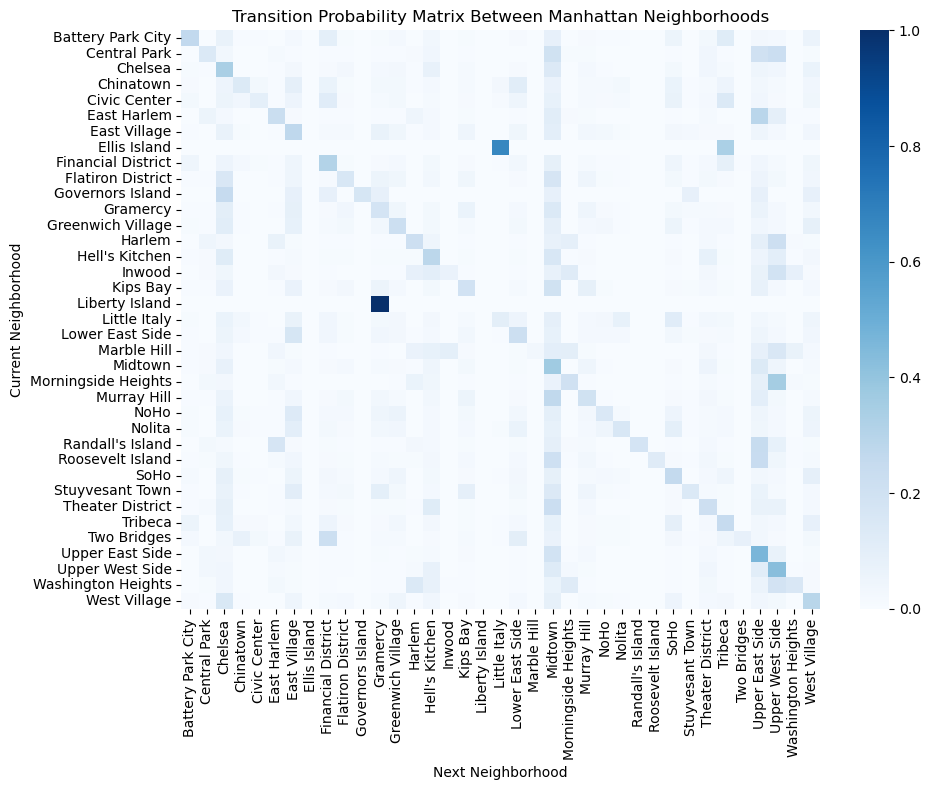

Top 10 Most Common Routes:
              From               To    Count
0          Midtown          Midtown  1425469
1  Upper East Side  Upper East Side  1300386
2  Upper West Side  Upper West Side   767943
3          Chelsea          Chelsea   666494
4  Upper East Side          Midtown   534442
5          Midtown  Upper East Side   518504
6   Hell's Kitchen   Hell's Kitchen   348918
7          Midtown          Chelsea   290090
8          Chelsea          Midtown   274906
9     West Village     West Village   243635


In [112]:
import pickle

with open("data/taxicab.pkl", "rb") as f:
    cab_sequences = pickle.load(f)  # list of pd.Series, each being a sequence of neighborhoods

# --- Clean and Extract State Space ---
# Combine all neighborhood names to find unique ones within Manhattan
all_states = pd.concat(cab_sequences)
state_space = sorted(all_states.unique())

# Remove "Outside Manhattan" from the state space if only interested in Manhattan
state_space = [s for s in state_space if s != "Outside Manhattan"]
print(f"State space ({len(state_space)} states):", state_space)

# --- Clean the Sequences ---
# Keep only in-Manhattan neighborhoods for transitions
clean_sequences = [seq[seq != "Outside Manhattan"].reset_index(drop=True) for seq in cab_sequences]
clean_sequences = [seq for seq in clean_sequences if len(seq) > 1]  # remove too-short trips

# --- Compute Transition Counts ---
n = len(state_space)
transition_counts = np.zeros((n, n), dtype=int)
state_to_idx = {s: i for i, s in enumerate(state_space)}

for seq in clean_sequences:
    for i in range(len(seq) - 1):
        a, b = seq.iloc[i], seq.iloc[i + 1]
        if a in state_to_idx and b in state_to_idx:
            transition_counts[state_to_idx[a], state_to_idx[b]] += 1

# --- Convert to Transition Probability Matrix ---
transition_matrix = transition_counts / transition_counts.sum(axis=1, keepdims=True)
transition_matrix = np.nan_to_num(transition_matrix)  # replace NaNs with 0 for rows with no transitions

# --- Plot Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(transition_matrix, xticklabels=state_space, yticklabels=state_space, cmap="Blues")
plt.title("Transition Probability Matrix Between Manhattan Neighborhoods")
plt.xlabel("Next Neighborhood")
plt.ylabel("Current Neighborhood")
plt.tight_layout()
plt.show()

# --- Find Most Common Routes ---
transition_df = pd.DataFrame(transition_counts, index=state_space, columns=state_space)
top_routes = (
    transition_df.stack()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
top_routes.columns = ["From", "To", "Count"]

print("Top 10 Most Common Routes:")
print(top_routes)

A first-order Markov chain assumes that the probability of the next state depends only on the current state, not on the full history of past states.

For Manhattan taxi trips, this is a realistic assumption because a cab’s next neighborhood is mainly determined by its current location and passenger demand, not where it was two or more rides ago.

Each passenger’s trip is independent of previous passengers — once a drop-off occurs, the next ride typically starts near that location but is not influenced by older trips.

Higher-order models (e.g., order 2 or 3) would require tracking multi-step dependencies that don’t have much predictive gain but greatly increase complexity and sparsity in data.

In [118]:
# --- Start in Hell's Kitchen ---
start_state = "Hell's Kitchen"
pi = np.zeros(len(state_space))
pi[state_to_idx[start_state]] = 1  # 100% probability of starting here

# --- Forecast distributions ---
steps = [2, 3, 5, 10]

for n in steps:
    forecast = pi @ np.linalg.matrix_power(transition_matrix, n)
    forecast_series = pd.Series(forecast, index=state_space).sort_values(ascending=False)
    print(f"\nMost likely neighborhoods after {n} trips (starting in Hell's Kitchen):")
    print(forecast_series.head(5).round(3))


Most likely neighborhoods after 2 trips (starting in Hell's Kitchen):
Midtown            0.186
Hell's Kitchen     0.123
Chelsea            0.114
Upper West Side    0.104
Upper East Side    0.098
dtype: float64

Most likely neighborhoods after 3 trips (starting in Hell's Kitchen):
Midtown            0.189
Upper East Side    0.120
Chelsea            0.105
Upper West Side    0.098
Hell's Kitchen     0.080
dtype: float64

Most likely neighborhoods after 5 trips (starting in Hell's Kitchen):
Midtown            0.188
Upper East Side    0.134
Chelsea            0.097
Upper West Side    0.091
Hell's Kitchen     0.062
dtype: float64

Most likely neighborhoods after 10 trips (starting in Hell's Kitchen):
Midtown            0.187
Upper East Side    0.136
Chelsea            0.096
Upper West Side    0.088
Hell's Kitchen     0.059
dtype: float64


In [125]:
# --- Start in Tribeca ---
start_state = "Tribeca"
pi = np.zeros(len(state_space))
pi[state_to_idx[start_state]] = 1  # 100% probability of starting here

# --- Forecast distributions ---
steps = 20

for n in range(steps + 1):  # include step 0 if desired
    forecast = pi @ np.linalg.matrix_power(transition_matrix, n)
    forecast_series = pd.Series(forecast, index=state_space).sort_values(ascending=False)
    
    # print only every 5th step (5, 10, 15, ...)
    if n % 10 == 0 and n != 0:
        print(f"\nMost likely neighborhoods after {n} trips (starting in Tribeca):")
        print(forecast_series.head(5).round(3))



Most likely neighborhoods after 10 trips (starting in Tribeca):
Midtown            0.186
Upper East Side    0.135
Chelsea            0.097
Upper West Side    0.086
Hell's Kitchen     0.059
dtype: float64

Most likely neighborhoods after 20 trips (starting in Tribeca):
Midtown            0.187
Upper East Side    0.136
Chelsea            0.096
Upper West Side    0.088
Hell's Kitchen     0.059
dtype: float64


From this forecast, it is clear that cabs spend most of their time in Midtown.